# Imports

In [74]:
import matplotlib.pyplot as plt
from tqdm import tqdm

import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from src.features.segmentation.dataset import SegmentationDataset

import albumentations

import transformers

# Dataset

In [75]:
train_batch_size = 8
val_batch_size = 4
pin_memory = True
num_workers = 4

In [77]:
train_augmentation_transform = albumentations.Compose([
    albumentations.RandomCrop(height=512, width=512),
    albumentations.ShiftScaleRotate(shift_limit=0.05, scale_limit=0.05, rotate_limit=30, p=0.5)
])

In [79]:
image_processor = transformers.SegformerImageProcessor()

In [80]:
train_dataset = SegmentationDataset(
    images_dir=train_images_dir,
    masks_dir=train_masks_dir,
    augmentation_transform=train_augmentation_transform,
    image_processor=image_processor
)

val_dataset = SegmentationDataset(
    images_dir=val_images_dir,
    masks_dir=val_masks_dir,
    image_processor=image_processor
)

In [ ]:
print("Number of training examples:", len(train_dataset))
print("Number of validation examples:", len(val_dataset))

In [ ]:
pixel_values, mask = train_dataset[0]
print(pixel_values.shape)
print(mask.shape)

In [ ]:
plt.imshow(pixel_values.permute(1,2,0))

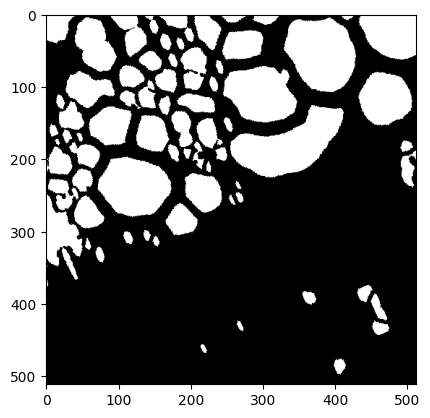

In [84]:
plt.imshow(mask, cmap='gray')

In [ ]:
train_dataloader = DataLoader(train_dataset, batch_size=train_batch_size, shuffle=True, pin_memory=pin_memory, num_workers=num_workers)
val_dataloader = DataLoader(val_dataset, batch_size=val_batch_size, pin_memory=pin_memory, num_workers=num_workers)

# Model

In [33]:
model = transformers.SegformerForSemanticSegmentation.from_pretrained("nvidia/segformer-b1-finetuned-ade-512-512")

In [ ]:
optimizer = torch.optim.AdamW(model.parameters(), lr=0.0005)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
torch.backends.cuda.matmul.allow_tf32 = False
torch.backends.cudnn.benchmark = True
model.to(device)

In [36]:
epoch_num = 2

In [39]:
def save_model(model, path):
    torch.save(model.state_dict(), path)